In [67]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [68]:
Br = pd.read_csv("(only mammals) including whole brain data 03 03 2024.csv")
Br.head(8)

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,African sheath-tailed bat,Chiroptera,Emballonuridae,0.0899,0.0540,0.244,"5,080,000","47,984,000","58,580,000",11.5
2,Little free-tailed bat,Chiroptera,Molossidae,0.0840,0.0360,0.208,"5,632,000","25,324,000","34,958,000",5.4
3,Rufous trident bat,Chiroptera,Hipposideridae,0.0930,0.0720,0.251,"6,039,000","59,651,000","69,763,000",13.7
4,Common bent-wing bat,Chiroptera,Miniopteridae,0.0858,0.0485,0.219,"6,116,000","44,447,000","55,659,000",11.6
5,Naked mole-rat,Rodentia,Heterocephalidae,0.1840,0.0480,0.392,"6,150,000","15,740,000","26,880,000",35.3
6,Commerson's roundleaf bat,Chiroptera,Hipposideridae,0.2430,0.1070,0.588,"7,877,000","51,875,000","66,719,000",101.9
7,Smoky shrew,Eulipotyphla,Soricidae,0.0840,0.0200,0.176,"9,730,000","20,870,000","36,460,000",7.5


In [69]:
Br = Br.dropna()

In [70]:
Br.dtypes

Animal            object
Order             object
Family            object
Forebrain m      float64
Cerebellum m     float64
Whole brain m    float64
Forebrain n       object
Cerebellum n      object
Whole brain n     object
Body m           float64
dtype: object

In [71]:
Br.head(7)

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m
1,African sheath-tailed bat,Chiroptera,Emballonuridae,0.0899,0.0540,0.244,"5,080,000","47,984,000","58,580,000",11.5
2,Little free-tailed bat,Chiroptera,Molossidae,0.0840,0.0360,0.208,"5,632,000","25,324,000","34,958,000",5.4
3,Rufous trident bat,Chiroptera,Hipposideridae,0.0930,0.0720,0.251,"6,039,000","59,651,000","69,763,000",13.7
4,Common bent-wing bat,Chiroptera,Miniopteridae,0.0858,0.0485,0.219,"6,116,000","44,447,000","55,659,000",11.6
5,Naked mole-rat,Rodentia,Heterocephalidae,0.1840,0.0480,0.392,"6,150,000","15,740,000","26,880,000",35.3
6,Commerson's roundleaf bat,Chiroptera,Hipposideridae,0.2430,0.1070,0.588,"7,877,000","51,875,000","66,719,000",101.9
7,Smoky shrew,Eulipotyphla,Soricidae,0.0840,0.0200,0.176,"9,730,000","20,870,000","36,460,000",7.5


In [72]:
if Br['Forebrain n'].dtype != 'float64':
     Br['Forebrain n'] = Br['Forebrain n'].str.replace(',', '').astype(float)
if Br['Cerebellum n'].dtype != 'float64':
     Br['Cerebellum n'] = Br['Cerebellum n'].str.replace(',', '').astype(float)
if Br['Whole brain n'].dtype != 'float64':
     Br['Whole brain n'] = Br['Whole brain n'].str.replace(',', '').astype(float)

In [73]:
Br.dtypes

Animal            object
Order             object
Family            object
Forebrain m      float64
Cerebellum m     float64
Whole brain m    float64
Forebrain n      float64
Cerebellum n     float64
Whole brain n    float64
Body m           float64
dtype: object

In [74]:
Br.head(5)

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m
1,African sheath-tailed bat,Chiroptera,Emballonuridae,0.0899,0.0540,0.244,5080000.0,47984000.0,58580000.0,11.5
2,Little free-tailed bat,Chiroptera,Molossidae,0.0840,0.0360,0.208,5632000.0,25324000.0,34958000.0,5.4
3,Rufous trident bat,Chiroptera,Hipposideridae,0.0930,0.0720,0.251,6039000.0,59651000.0,69763000.0,13.7
4,Common bent-wing bat,Chiroptera,Miniopteridae,0.0858,0.0485,0.219,6116000.0,44447000.0,55659000.0,11.6
5,Naked mole-rat,Rodentia,Heterocephalidae,0.1840,0.0480,0.392,6150000.0,15740000.0,26880000.0,35.3


In [75]:
Br.describe()

,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m
count,93.000000,93.000000,93.000000,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01
mean,116.481663,28.384414,166.880505,7.098237e+08,6.613180e+09,7.400044e+09,1.807794e+05
std,422.119925,134.205781,621.031602,2.180229e+09,2.960656e+10,3.115189e+10,9.436925e+05
min,0.084000,0.020000,0.176000,5.080000e+06,1.574000e+07,2.688000e+07,5.400000e+00
25%,0.446000,0.188000,1.240000,2.127000e+07,1.097500e+08,1.499800e+08,1.019000e+02
50%,5.228000,1.196000,9.132000,9.896000e+07,3.609290e+08,4.942000e+08,1.150000e+03
75%,40.194000,6.632000,62.724000,4.715000e+08,1.969000e+09,2.640000e+09,1.206600e+04
max,2847.000000,1171.000000,4618.000000,1.634000e+10,2.507000e+11,2.570400e+11,7.500000e+06


In [ ]:
Br.to_csv('/content/mammals.csv')

In [76]:
X = Br[["Forebrain m", "Cerebellum m", "Whole brain m", "Body m", "Order"]]
Y1 = Br["Forebrain n"]
Y2 = Br["Cerebellum n"]
Y3 = Br["Whole brain n"]

In [77]:
x_train, x_test, y_train1, y_test1 = train_test_split(X, Y1, test_size=0.25, random_state=42)

In [78]:
cat_cols = ["Order"]

In [79]:
regrneo = RandomForestRegressor(random_state=42)
OHE = OneHotEncoder(handle_unknown='ignore')

In [80]:
transformer = ColumnTransformer([('cat_cols', OHE, cat_cols)], remainder = 'passthrough')

In [81]:
pipe = Pipeline([("preprocessing", transformer),
                ("classifier", regrneo)])

In [82]:
pipe.fit(x_train, y_train1)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Order'])])),
                ('classifier', RandomForestRegressor(random_state=42))])

In [84]:
# Killer whale
d = {'Forebrain m': [5065], 'Cerebellum m': [857], 'Whole brain m': [6211], 'Body m': [3987500], 'Order': ['Artiodactyla']}
df = pd.DataFrame(data=d)
pipe.predict(df)

array([7.54135e+09])

In [85]:
mean_squared_error(y_test1, pipe.predict(x_test))

3.1806075207745274e+17

In [86]:
r2_score(y_test1, pipe.predict(x_test))

0.746132139834202

In [87]:
X_num = Br[["Forebrain m", "Cerebellum m", "Whole brain m", "Body m"]]

In [88]:
x_train_num, x_test_num, y_train_num, y_test_num = train_test_split(X_num, Y1, test_size=0.25, random_state=42)

In [89]:
regr_num = RandomForestRegressor(random_state=42)

In [90]:
regr_num.fit(x_train_num, y_train_num)

RandomForestRegressor(random_state=42)

In [91]:
mean_squared_error(y_test_num, regr_num.predict(x_test_num))

2.6756973554507606e+17

In [92]:
r2_score(y_test_num, regr_num.predict(x_test_num))

0.7864327624069267

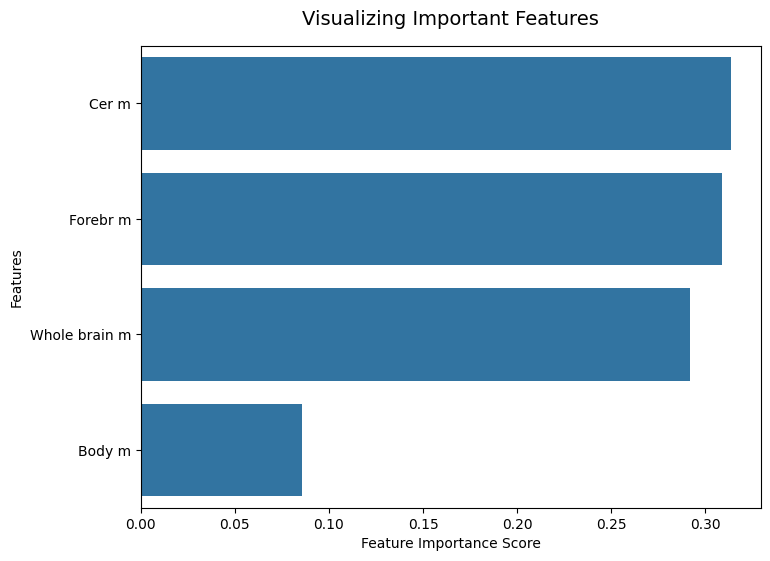

In [93]:
fig01 = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(regr_num.feature_importances_, index=['Forebr m', 'Cer m', 'Whole brain m', 'Body m']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [94]:
# Killer whale
regr_num.predict([[5065, 857, 6211, 3987500]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.64929e+09])

In [95]:
X_all = Br[["Forebrain m", "Cerebellum m", "Whole brain m", "Body m", "Order", "Family"]]

In [96]:
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X_all, Y1, test_size=0.25, random_state=42)

In [97]:
cat_cols = ["Order", "Family"]

In [98]:
regrneo_all = RandomForestRegressor(random_state=42)
OHE = OneHotEncoder(handle_unknown='ignore')

In [99]:
transformer = ColumnTransformer([('cat_cols', OHE, cat_cols)], remainder = 'passthrough')

In [100]:
pipe_all = Pipeline([("preprocessing", transformer),
                ("classifier", regrneo_all)])

In [101]:
pipe_all.fit(x_train_all, y_train_all)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Order', 'Family'])])),
                ('classifier', RandomForestRegressor(random_state=42))])

In [102]:
mean_squared_error(y_test_all, pipe_all.predict(x_test_all))

2.152486545306502e+17

In [103]:
r2_score(y_test_all, pipe_all.predict(x_test_all))

0.828194095082953

In [104]:
# Killer whale
d2 = {'Forebrain m': [5065], 'Cerebellum m': [857], 'Whole brain m': [6211], 'Body m': [3987500], 'Order': ['Artiodactyla'], 'Family': ['Delphinidae']}
df2 = pd.DataFrame(data=d2)
pipe_all.predict(df2)

array([8.62312e+09])